Capstone Project – The Battle of Neighborhoods | Finding a Better Place in Etobicoke, Toronto

In [ ]:
pip install geocoder

In [ ]:
#import io,request pandas and folium libraries
import io
import requests
import pandas as pd
import folium
import numpy as np
import geocoder
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")


All Required Libraries Imported!


In [ ]:
#obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_list = pd.read_html(url)

In [ ]:
len(df_list)

3

In [ ]:
df=pd.read_html(url)[0]

In [ ]:
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [ ]:
df1 = pd.DataFrame(data=df)

In [ ]:
df1

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [ ]:
#Searching for null values
df1.isna().mean()*100

Postal Code      0.0
Borough          0.0
Neighbourhood    0.0
dtype: float64

In [ ]:
indexNames = df1[ df1['Borough'] == 'Not assigned' ].index

In [ ]:
df1.drop(indexNames , inplace=True)#droping the Borough with Not assigned value

In [ ]:
df1

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [ ]:
df1.shape #shape of required dataframe

(103, 3)

Checkpoint 2

In [ ]:
#importing the csv file containing the coordinates of longitude and latitude
long_lat=pd.read_csv("Geospatial_Coordinates.csv")
long_lat

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [ ]:
#Joining final dataframe and coordinate dataset
df_final=df1.join(long_lat.set_index('Postal Code'), on='Postal Code')

In [ ]:
df_final.shape

(103, 5)

In [ ]:
df_final.isna().mean()*100

Postal Code      0.0
Borough          0.0
Neighbourhood    0.0
Latitude         0.0
Longitude        0.0
dtype: float64

In [ ]:
#Final Dataset for further operations
df_final

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
9,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
11,M3B,North York,Don Mills,43.745906,-79.352188
12,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Checkpoint-3  clustering the neighborhoods in Toronto

In [ ]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_final['Borough'].unique()),
        df_final.shape[0] ))

The dataframe has 10 boroughs and 103 neighborhoods.


In [ ]:

address = 'Etobicoke, canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Etobicoke City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Etobicoke City are 43.6435559, -79.5656326.


In [ ]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_final['Latitude'], df_final['Longitude'], df_final['Borough'], df_final['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [ ]:
CLIENT_ID =  # my Foursquare ID
CLIENT_SECRET =  # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

In [ ]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [ ]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Tim Hortons,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.644705,-79.567659
1,Farmer's Market Etobicoke,"[{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...",43.643061,-79.566191
2,Loblaws,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",43.643848,-79.560113
3,State & Main Kitchen & Bar,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.645778,-79.560374
4,TD Canada Trust,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",43.645502,-79.560006


In [ ]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Tim Hortons,Coffee Shop,43.644705,-79.567659
1,Farmer's Market Etobicoke,Farmers Market,43.643061,-79.566191
2,Loblaws,Grocery Store,43.643848,-79.560113
3,State & Main Kitchen & Bar,Restaurant,43.645778,-79.560374
4,TD Canada Trust,Bank,43.645502,-79.560006


In [ ]:

# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Restaurant            1
Clothing Store        1
Mexican Restaurant    1
Recreation Center     1
IT Services           1
Gym                   1
Hotel                 1
Café                  1
Sandwich Place        1
Park                  1
Name: categories, dtype: int64

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Etobicoke_venues = getNearbyVenues(names=df_final['Neighbourhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [ ]:
print('There are {} Uniques Categories.'.format(len(Etobicoke_venues['Venue Category'].unique())))
Etobicoke_venues.groupby('Neighborhood').count().head()

There are 319 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,7,7,7,7,7,7
"Alderwood, Long Branch",13,13,13,13,13,13
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,7,7,7,7,7,7
"Bedford Park, Lawrence Manor East",31,31,31,31,31,31


In [ ]:
# one hot encoding
Etobicoke_onehot = pd.get_dummies(Etobicoke_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Etobicoke_onehot['Neighborhood'] = Etobicoke_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Etobicoke_onehot.columns[-1]] + list(Etobicoke_onehot.columns[:-1])
Etobicoke_onehot = Etobicoke_onehot[fixed_columns]
Etobicoke_grouped = Etobicoke_onehot.groupby('Neighborhood').mean().reset_index()
Etobicoke_onehot.head(5)

,Yoga Studio,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pier,Pilates Studio,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse

In [ ]:
num_top_venues = 5
for hood in Etobicoke_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Etobicoke_grouped[Etobicoke_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                       venue  freq
0  Latin American Restaurant  0.14
1             Sandwich Place  0.14
2                     Lounge  0.14
3               Skating Rink  0.14
4            Badminton Court  0.14


---- Alderwood, Long Branch ----
               venue  freq
0        Pizza Place  0.15
1  Convenience Store  0.15
2       Dance Studio  0.08
3        Gas Station  0.08
4       Skating Rink  0.08


---- Bathurst Manor, Wilson Heights, Downsview North ----
               venue  freq
0               Bank  0.09
1        Coffee Shop  0.09
2               Park  0.05
3              Diner  0.05
4  Mobile Phone Shop  0.05


---- Bayview Village ----
                venue  freq
0                Bank  0.29
1  Chinese Restaurant  0.14
2                Café  0.14
3       Grocery Store  0.14
4        Skating Rink  0.14


---- Bedford Park, Lawrence Manor East ----
                  venue  freq
0           Coffee Shop  0.10
1    Italian Restaurant  0.10
2        Sandwich P

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Etobicoke_grouped['Neighborhood']

for ind in np.arange(Etobicoke_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Etobicoke_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Pool Hall,Lounge,Badminton Court,Sandwich Place,Latin American Restaurant,Skating Rink,Breakfast Spot,Event Space,Ethiopian Restaurant,Electronics Store
1,"Alderwood, Long Branch",Pizza Place,Convenience Store,Gas Station,Pool,Pub,Coffee Shop,Gym,Sandwich Place,Dance Studio,Pharmacy
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Middle Eastern Restaurant,Park,Fried Chicken Joint,Sandwich Place,Sushi Restaurant,Shopping Mall,Deli / Bodega,Supermarket
3,Bayview Village,Bank,Skating Rink,Grocery Store,Japanese Restaurant,Chinese Restaurant,Café,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Liquor Store,Bagel Shop,Bakery,Bank,Juice Bar,Sushi Restaurant


In [ ]:
Etobicoke_grouped_clustering = Etobicoke_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Etobicoke_grouped_clustering)
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 2], dtype=int32)

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Etobicoke_merged =df_final.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Etobicoke_merged = Etobicoke_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

Etobicoke_merged.head()# check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M3A,North York,Parkwoods,43.753259,-79.329656,2,Park,Pet Store,Construction & Landscaping,Food & Drink Shop,Bed & Breakfast,Women's Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
3,M4A,North York,Victoria Village,43.725882,-79.315572,1,Hockey Arena,French Restaurant,Playground,Coffee Shop,Pizza Place,Park,Café,Sporting Goods Shop,Portuguese Restaurant,Gym
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Café,Theater,Restaurant,Pub,Bakery,Thai Restaurant,Performing Arts Venue,Breakfast Spot
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1,Clothing Store,Accessories Store,Coffee Shop,Vietnamese Restaurant,Fast Food Restaurant,Miscellaneous Shop,Furniture / Home Store,Women's Store,Seafood Restaurant,Men's Store
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burrito Place,Japanese Restaurant,Park,Diner,Beer Bar,Bookstore


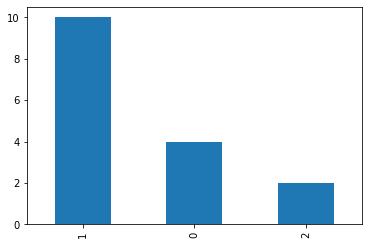

In [ ]:
Etobicoke_merged['Cluster Label'].value_counts().plot(kind='bar')

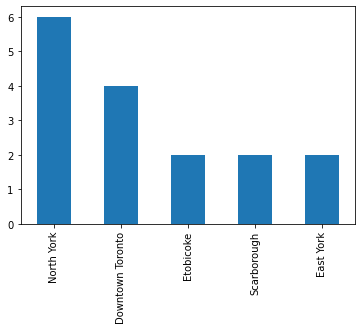

In [ ]:
Etobicoke_merged['Borough'].value_counts().plot(kind='bar')

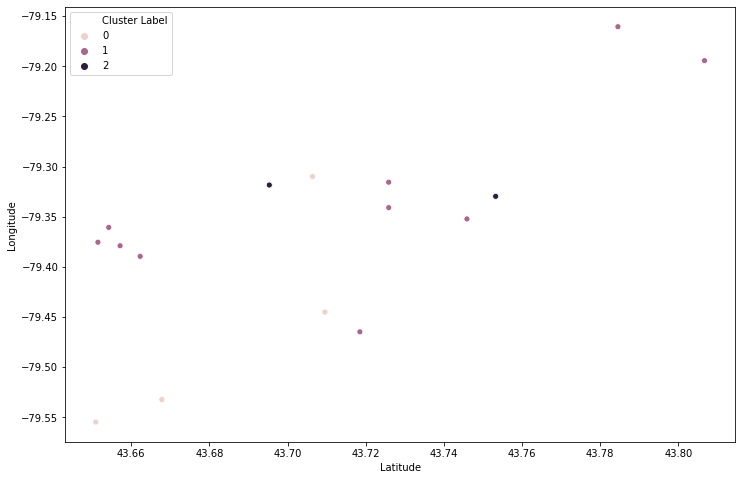

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Latitude',y='Longitude',hue='Cluster Label',legend='full',data=Etobicoke_merged)

plt.title('')
plt.show()

In [ ]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Etobicoke_merged['Latitude'], Etobicoke_merged['Longitude'], Etobicoke_merged['Borough'], Etobicoke_merged['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork